Pierre-Elliott THIBOUD  
Julien PERIER-CAMBY  

# IBI - TP1
## Partie 1

In [61]:
import gzip # pour décompresser les données
import pickle # pour désérialiser les données
import numpy as np # pour pouvoir utiliser des matrices
import matplotlib.pyplot as plt # pour l'affichage
import torch,torch.utils.data
from tqdm import tqdm_notebook as tqdm

In [5]:
def affichage(image,label):
    # on récupère à quel chiffre cela correspond (position du 1 dans label)
    label = np.argmax(label)
    # on crée une figure
    plt.figure()
    # affichage du chiffre
    # le paramètre interpolation='nearest' force python à afficher chaque valeur de la matrice sans l'interpoler avec ses voisines
    # le paramètre cmap définit l'échelle de couleur utilisée (ici noire et blanc)
    plt.imshow(image.reshape((28,28)),interpolation='nearest',cmap='binary')
    # on met un titre
    plt.title('chiffre '+str(label))
    # on affichage les figures créées
    plt.show()

### Chargement des données

In [3]:
TRAIN_BATCH_SIZE = 1

data = pickle.load(gzip.open('mnist.pkl.gz'),encoding='latin1')

train_data = torch.Tensor(data[0][0])
# labels de la base d'apprentissage
train_data_label = torch.Tensor(data[0][1])
# images de la base de test
test_data = torch.Tensor(data[1][0])
# labels de la base de test
test_data_label = torch.Tensor(data[1][1])
# on crée la base de données d'apprentissage (pour torch)
train_dataset = torch.utils.data.TensorDataset(train_data,train_data_label)
# on crée la base de données de test (pour torch)
test_dataset = torch.utils.data.TensorDataset(test_data,test_data_label)
# on crée le lecteur de la base de données d'apprentissage (pour torch)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
# on crée le lecteur de la base de données de test (pour torch)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

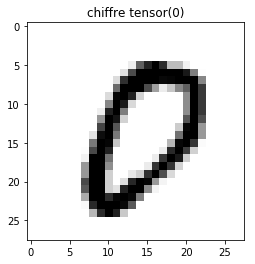

In [6]:
affichage(train_data[0], train_data_label[0])

### Paramètres

In [75]:
input_dim = 784
nb_class = 10

epochs = 4

learning_rate = 1e-2

In [53]:
class Perceptron:
    def __init__(self, nb_class, input_dim):
        self.weights = np.random.normal(loc=0.0,scale=1.0,size=(nb_class,input_dim+1))

    def forward(self, x):
        # Return output
        #print(x)
        x = np.append(x.flatten(),1)
#         print(x.size())
        return np.dot(self.weights, x)

    def backward(self, x, y, t):
        error = t - y
        # Rajoute le biais
        x = np.append(x.flatten(), 1)
        
        # passe de x(785,) à x(785, 10)
        x = np.repeat(x[:, np.newaxis], 10, axis=1)
        delta = error * x * learning_rate
        
        # Mise à jour des poids
        self.weights *= delta.T

In [76]:
model = Perceptron(nb_class, input_dim)

def training():
    for epoch in tqdm(range(epochs), desc="Epochs"):
        for (_,(image,label)) in enumerate(train_loader):
            # on demande les prochaines données de la base
            y = model.forward(image)
            model.backward(image.numpy(), y, label.numpy())
            
training()

KeyboardInterrupt: 

In [74]:
def test():
    true_positives = 0
    for (_,(image,label)) in enumerate(tqdm(test_loader)):
        y = model.forward(image)
        if np.argmax(label.numpy()) == np.argmax(y):
            true_positives += 1
    print("Accuracy: ", true_positives/len(test_loader))
    
test()

Accuracy:  0.09785714285714285
